# Fake News Linguistic Exploratory Data Analysis

### Import statements

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
!pip install -U spacy

In [4]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import spacy
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Reading in File

In [6]:
news_dataset = pd.read_csv("manual_dataset.csv", index_col=0) # your file path here with True and Fake art
news_dataset.head()

,Real_Fake,News Source,Link,Date,Topic/ Keyword (if applicable),Title,Text
#,,,,,,,
0,Real,The Globe and Mail,https://www.theglobeandmail.com/business/comme...,2/19/2024,Renewable energy,"With Alberta renewables ban, business common s...","Investment creates jobs, expands tax revenue, ..."
1,Real,CBC News,https://www.cbc.ca/news/canada/calgary/oil-ind...,2/22/24,Oil,Some sectors of oil industry 'dragging their h...,Prime Minister Justin Trudeau and Alberta Prem...
2,Real,CBC News,https://www.cbc.ca/news/canada/thunder-bay/cat...,03/04/24,Mining,"Demanding a proper say, Cat Lake First Nation'...",Cat Lake First Nation has been granted an inju...
3,Real,CBC News,https://www.cbc.ca/news/politics/guilbeault-no...,02/14/24,Climate,Feds will stop investing in 'large' road proje...,Environment Minister Steven Guilbeault said Mo...
4,Real,Global News,https://globalnews.ca/news/10292216/climate-ch...,02/13/2024,Climate,Floods and fires: Climate change brings health...,Communities across British Columbia needs to p...


### Cleaning Text

In [7]:
def remove_news_agency_name(text):
    return re.sub(r"Reuters|AP|New York Times|Washington Post|Business Insider|Atlantic|Fox News|National Review|Talking Points Memo|Buzzfeed News|Guardian|NPR|Vox|CNN|BBC|Bloomberg|Daily Mail|21st Century Wire|21st Century|Al Jazeera|21WIRE|ABC News", "", text)

In [20]:
# ensure that the text column name 'Text' is the same as the 

news_dataset['Text'] = news_dataset['Text'].apply(lambda x: remove_news_agency_name(str(x)))
news_dataset['Text'] = news_dataset.Text.apply(lambda x:str(x))
news_dataset['Text'] = news_dataset.Text.apply(lambda x:x.lower())
news_dataset['Text'] = news_dataset.Text.apply(lambda x:re.sub(r'[^\w\s]+', ' ', x))
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(txt):
    no_stopwords = [word for word in txt.split() if word not in stop_words]
    return ' '.join(no_stopwords)
news_dataset['Text'] = news_dataset['Text'].apply(remove_stopwords)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# adding token column for analysis

news_dataset["Text_Tokens"] = news_dataset["Text"].apply(lambda x: x.split())

In [22]:
news_dataset.head()

,Real_Fake,News Source,Link,Date,Topic/ Keyword (if applicable),Title,Text,Text_Tokens
#,,,,,,,,
0,Real,The Globe and Mail,https://www.theglobeandmail.com/business/comme...,2/19/2024,Renewable energy,"With Alberta renewables ban, business common s...",investment creates jobs expands tax revenue pr...,"[investment, creates, jobs, expands, tax, reve..."
1,Real,CBC News,https://www.cbc.ca/news/canada/calgary/oil-ind...,2/22/24,Oil,Some sectors of oil industry 'dragging their h...,prime minister justin trudeau alberta premier ...,"[prime, minister, justin, trudeau, alberta, pr..."
2,Real,CBC News,https://www.cbc.ca/news/canada/thunder-bay/cat...,03/04/24,Mining,"Demanding a proper say, Cat Lake First Nation'...",cat lake first nation granted injunction pausi...,"[cat, lake, first, nation, granted, injunction..."
3,Real,CBC News,https://www.cbc.ca/news/politics/guilbeault-no...,02/14/24,Climate,Feds will stop investing in 'large' road proje...,environment minister steven guilbeault said mo...,"[environment, minister, steven, guilbeault, sa..."
4,Real,Global News,https://globalnews.ca/news/10292216/climate-ch...,02/13/2024,Climate,Floods and fires: Climate change brings health...,communities across british columbia needs prep...,"[communities, across, british, columbia, needs..."


## Text Comparisons

### Length Comparison - Real vs Fake

In [23]:
news_dataset['text_len'] = news_dataset['Text'].apply(lambda x: len(x.split()))

In [24]:
news_dataset.groupby('Real_Fake')['text_len'].mean()

Real_Fake
Fake    704.933333
Real    523.533333
Name: text_len, dtype: float64

In [25]:
# ANOVA test comparing means text length of real and fake news
text_len_ols = ols('text_len ~ Real_Fake', data=news_dataset).fit()
table = sm.stats.anova_lm(text_len_ols, typ=2) # type 2 ANOVA DataFrame
print(table)

                 sum_sq    df         F    PR(>F)
Real_Fake  2.467947e+05   1.0  1.045397  0.315323
Residual   6.610173e+06  28.0       NaN       NaN


Text(0.5, 1.0, 'Text Length by Real and Fake News')

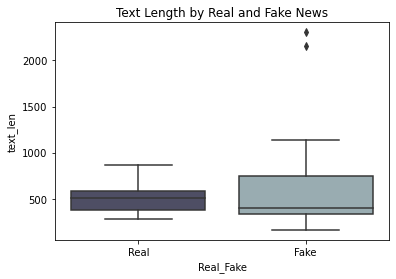

In [59]:
sns.boxplot(x='Real_Fake', y='text_len', data=news_dataset, palette='bone')
plt.title('Text Length by Real and Fake News')

Text(0.5, 1.0, 'Text Length by Real and Fake News')

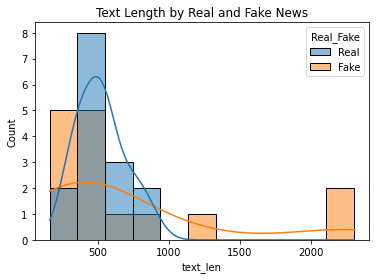

In [27]:
sns.histplot(news_dataset, x='text_len', hue='Real_Fake', kde=True)
plt.title('Text Length by Real and Fake News')

### Polarity Comparison - Real vs Fake

In [28]:
# creating a function to calculate the polarity of the text

sent_analyzer = SentimentIntensityAnalyzer()
def polarity(token_list, pol_type):
    sentiment = sent_analyzer.polarity_scores(' '.join(token_list))
    return sentiment[pol_type]

In [29]:
news_dataset['comp_sentiment'] = news_dataset["Text_Tokens"].apply(lambda x: polarity(x, 'compound'))
news_dataset.groupby('Real_Fake')['comp_sentiment'].mean()

Real_Fake
Fake    0.230327
Real    0.410160
Name: comp_sentiment, dtype: float64

In [30]:
# real news has a higher compound sentiment score than fake news --> this means that it is more positive!

In [31]:
# ANOVA test comparing compound sentiment of real and fake news
text_len_ols = ols('comp_sentiment ~ Real_Fake', data=news_dataset).fit()
table = sm.stats.anova_lm(text_len_ols, typ=2) # type 2 ANOVA DataFrame
print(table)

              sum_sq    df         F    PR(>F)
Real_Fake   0.242550   1.0  0.350612  0.558518
Residual   19.370124  28.0       NaN       NaN


In [32]:
news_dataset['neg_sentiment'] = news_dataset["Text_Tokens"].apply(lambda x: polarity(x, 'neg'))
news_dataset.groupby('Real_Fake')['neg_sentiment'].mean()

Real_Fake
Fake    0.100467
Real    0.085133
Name: neg_sentiment, dtype: float64

In [33]:
# ANOVA test comparing negative sentiment of real and fake news
text_len_ols = ols('neg_sentiment ~ Real_Fake', data=news_dataset).fit()
table = sm.stats.anova_lm(text_len_ols, typ=2) # type 2 ANOVA DataFrame
print(table)

             sum_sq    df         F    PR(>F)
Real_Fake  0.001763   1.0  0.600258  0.444973
Residual   0.082253  28.0       NaN       NaN


In [34]:
## higher values here mean more negative content, so this shows that the fake articles are slightly more negative

Text(0.5, 1.0, 'Compound Sentiment by Real and Fake News')

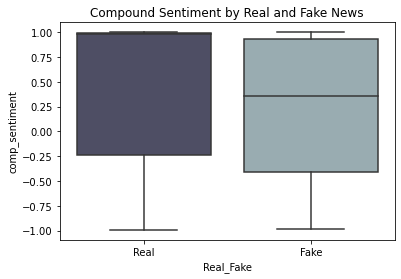

In [58]:
sns.boxplot(x='Real_Fake', y='comp_sentiment', data=news_dataset, palette='bone')
plt.title('Compound Sentiment by Real and Fake News')

Text(0.5, 1.0, 'Real News Sentiment')

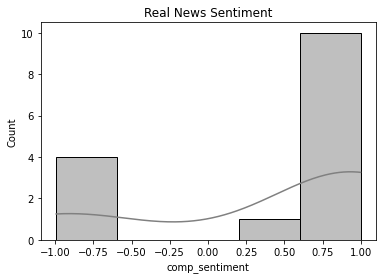

In [61]:
sns.histplot(news_dataset[news_dataset['Real_Fake'] == 'Real']['comp_sentiment'], kde=True, color='grey')
plt.title('Real News Sentiment') 

Text(0.5, 1.0, 'Fake News Sentiment')

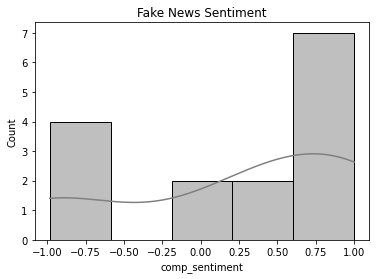

In [62]:
sns.histplot(news_dataset[news_dataset['Real_Fake'] == 'Fake']['comp_sentiment'], kde=True, color='grey')
plt.title('Fake News Sentiment')

### Most Common Word Comparison - Real vs Fake

In [38]:
news_dataset['most_common_word'] = news_dataset['Text_Tokens'].apply(lambda x: Counter(x).most_common(3))

In [39]:
def make_most_common_word_list(row):
    return [word[0] for word in row]

In [40]:
# making column that has just the words in a list and not the frequency of each word in a tuple
news_dataset['most_common_word_l'] = news_dataset['most_common_word'].apply(make_most_common_word_list)

In [41]:
news_dataset[news_dataset['Real_Fake'] == 'Real']['most_common_word_l'].explode().value_counts().head(5)

said        7
alberta     3
health      3
fire        2
thunberg    1
Name: most_common_word_l, dtype: int64

In [42]:
news_dataset[news_dataset['Real_Fake'] == 'Fake']['most_common_word_l'].explode().value_counts().head(5)

climate    5
warming    4
ice        2
minimum    2
solar      2
Name: most_common_word_l, dtype: int64

In [43]:
# this makes sense, becuase "said" typically appears in real news articles and "climate" typically appears in fake news articles
# the true words are generally more mundane, where as the fake words are more attention-grabbing

### Most Common Part of Speech Comparison - Real vs Fake

In [44]:
nlp = spacy.load('en_core_web_sm') 

In [45]:
def get_pos_count(tokenized_text, pos):
    if len(tokenized_text) == 0:
        return []
    else:
        doc = nlp(' '.join(tokenized_text))
        pos_l = [token.pos_ for token in doc]
        return Counter(pos_l)[pos]/ len(tokenized_text)

In [46]:
# adding columns for the percentage of each part of speech in the text

news_dataset['noun_count'] = news_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'NOUN'))
news_dataset['verb_count'] = news_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'VERB'))
news_dataset['adj_count'] = news_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'ADJ'))
news_dataset['adv_count'] = news_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'ADV'))
news_dataset['pron_count'] = news_dataset['Text_Tokens'].apply(lambda x: get_pos_count(x, 'PRON'))

In [47]:
news_dataset.groupby('Real_Fake')['adv_count'].mean()

Real_Fake
Fake    0.055583
Real    0.039470
Name: adv_count, dtype: float64

In [48]:
news_dataset.groupby('Real_Fake')['noun_count'].mean()

Real_Fake
Fake    0.423543
Real    0.444601
Name: noun_count, dtype: float64

In [49]:
news_dataset.groupby('Real_Fake')['adj_count'].mean()

Real_Fake
Fake    0.147941
Real    0.128149
Name: adj_count, dtype: float64

In [50]:
# ANOVA test comparing noun count of real and fake news
text_len_ols = ols('noun_count ~ Real_Fake', data=news_dataset).fit()
table = sm.stats.anova_lm(text_len_ols, typ=2) # type 2 ANOVA DataFrame
print(table)

             sum_sq    df         F    PR(>F)
Real_Fake  0.003326   1.0  2.794095  0.105753
Residual   0.033328  28.0       NaN       NaN


In [51]:
# ANOVA test comparing adverb count of real and fake news
text_len_ols = ols('adv_count ~ Real_Fake', data=news_dataset).fit()
table = sm.stats.anova_lm(text_len_ols, typ=2) # type 2 ANOVA DataFrame
print(table)

             sum_sq    df          F    PR(>F)
Real_Fake  0.001947   1.0  11.786726  0.001875
Residual   0.004626  28.0        NaN       NaN


In [52]:
# ANOVA test comparing adjective count of real and fake news
text_len_ols = ols('adj_count ~ Real_Fake', data=news_dataset).fit()
table = sm.stats.anova_lm(text_len_ols, typ=2) # type 2 ANOVA DataFrame
print(table)

             sum_sq    df         F    PR(>F)
Real_Fake  0.002938   1.0  3.322544  0.079032
Residual   0.024757  28.0       NaN       NaN


In [53]:
# statistical evidence that there are more adverbs and adjectives in fake news articles
# statistical evidence that there are more nounds in real news articles

Text(0.5, 1.0, 'Noun Count by Real and Fake News')

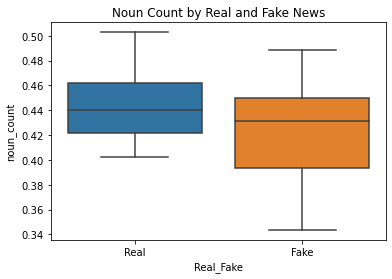

In [55]:
sns.boxplot(x='Real_Fake', y='noun_count', data=news_dataset)
plt.title('Noun Count by Real and Fake News')

Text(0.5, 1.0, 'Adverb Count by Real and Fake News')

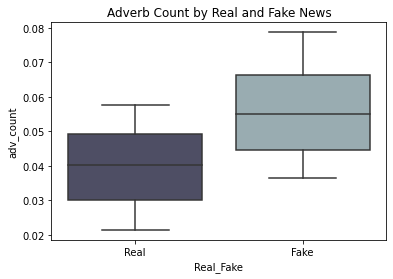

In [56]:
sns.boxplot(x='Real_Fake', y='adv_count', data=news_dataset, palette='bone')
plt.title('Adverb Count by Real and Fake News')

Text(0.5, 1.0, 'Adjective Count by Real and Fake News')

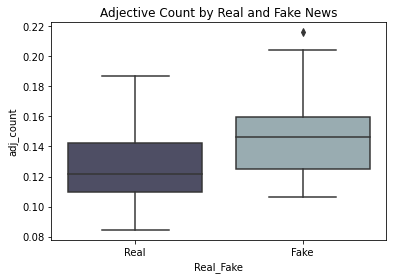

In [57]:
sns.boxplot(x='Real_Fake', y='adj_count', data=news_dataset, palette='bone')
plt.title('Adjective Count by Real and Fake News')